# Lab: Random Variable 💯

In statistics and data science, random variables are used to model events that have uncertain outcomes.  For example, in DISCOVERY, we explore the **binomial distribution** to model flipping a coin, drawing from a deck of cards, guessing on a multiple choice exam, and many other events with a single, fixed probability of success.  However, what if there are multiple different outcomes?  This lab will explore creating custom discrete distributions in Python to model complex events!

In this lab, you will explore a dataset of the real final scores of students in DISCOVERY!  Before we get to that, let's nerd out with the basics of a distribution! :)


A few tips to remember:

- **You are not alone on your journey in learning programming!**  You have your lab Teaching Assistant, your Course Aides, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help!  When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same **<i>ah-hah</i>** moment!
- We are here to help you!  Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [3]:
# Meet your CAs and TA if you haven't already!
# First name is enough, we'll know who they are! :)
ta_name = "Kunlun"
ca1_name = "Jai"
ca2_name = "Jessica"
ca3_name = ""

# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# QOTD to Ask Your Group: "What's your favorite RSO on campus?"
partner1_name = "Beichen"
partner1_netid = "beichen7"
partner1_rso = "CSSA"

partner2_name = ""
partner2_netid = ""
partner2_rso = ""

partner3_name = ""
partner3_netid = ""
partner3_rso = ""

<hr style="color: #DD3403;">

## Random Variable #1: Modeling Flipping a Coin Twice

In DISCOVERY, we introduce flipping a coin twice as an example binomial distribution.  Create a variable that contains a binomial distribution called `COIN` that models the distribution of the number of heads we see when we flip a coin two times:

(Not sure?  Check out the DISCOVERY page on "Python Functions for Random Distributions" here:
https://discovery.cs.illinois.edu/learn/Polling-Confidence-Intervals-and-Hypothesis-Testing/Python-Functions-for-Random-Distributions/)

In [4]:
from scipy.stats import binom
COIN = binom(2,1/2)

There are three different outcomes of flipping two coins and counting the number of heads:

| `COIN` ~ Number of Heads | P(`COIN` = #) |
| --------------: | ----------: |
| 0 heads | 25% |
| 1 head | 50% |
| 2 heads | 25% |

The **expected value** of the distribution is the weighted sum of the possible results.  This means we need to add together all possible outcomes:

- Zero heads, multiplied by the probability of getting zero heads, 
- One head, multiplied by the probability of getting one head, and
- Two heads, multiplied by the probability of getting two heads.

Mathematically, we can use the generic formula for the expected value of any discrete distribution:

$$EV_{COIN} = ((0\text{ heads}) * 25\%) + ((1\text{ head}) * 50\%) + ((2\text{ heads}) * 25\%)$$


Solving the equation:

- $EV_{COIN} = ((0\text{ heads}) * 25\%) + ((1\text{ head}) * 50\%) + ((2\text{ heads}) * 25\%)$
- $EV_{COIN} = (0\text{ heads}) + (0.5\text{ heads}) + (0.5\text{ heads})$
- $EV_{COIN} = 1\text{ heads}$


Alternatively, we can use the simplified formula for binominal variables:

$$EV_{binominal} = n * p$$

Solving the equation for the `COIN`:

- $EV_{COIN} = n * p$, where n=2, and p=0.5
- $EV_{COIN} = 2 * 0.5$
- $EV_{COIN} = 1\text{ heads}$


### Verifying our `COIN` Distribution in Python

Use `COIN.mean()` to verify the expected value in Python:

In [5]:
EV_COIN = COIN.mean()
EV_COIN

np.float64(1.0)

### 📝 Technical Note 📝

By default, on some configurations, `COIN.mean()` will often give you a non-native value and display something similar to:

> ```
> np.float64(1.0)
> ```

You will see this occur when working with scientific libraries that build from a library called `numpy` or `np`.
- It's okay to leave the value as a numpy data type, the value does not change.
- However, if you find this messy, you can use `.item()` to extract the Python native value out of a numpy data type.

For example, if you see np.float64(1.0), the following shows the result of using `.item()`:

> > ```py
> > COIN.mean()
> > ```
>
> Output: np.float64(1.0)
>
>
> > ```py
> > COIN.mean().item()
> > ```
>
> Output: 1.0

All of the test cases in this lab will support either both numpy data types and Python primitive data types, so do whatever one you think looks the best! :)

### 🔬 Checkpoint Tests 🔬

In [6]:
### TEST CASE for Random Variable #1: Modeling Flipping a Coin Twice
tada = "\N{PARTY POPPER}"
import math
assert("COIN" in vars()), "Make sure your random variable is named `COIN`."
assert(COIN.mean() == 1), "Check your parameters for your COIN distribution."
assert(EV_COIN == 1), "Your expected value is incorrect."
assert(math.isclose(COIN.std(), 2**(1/2)/2)), "Check your parameters for your COIN distribution."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Random Variable #2: The Value of a Dice Roll

A common distribution in statistics is to model the outcome of rolling a die.  Unfortunately, binominal distributions only have the output of a zero (not successful) or a one (successful).  However, a single die has six equally likely outcomes: 1, 2, 3, 4, 5, or 6.

To model this more complex event, we will use a **custom discrete distribution**.

### Requirements of a Custom Discrete Distributions

Similar to the binomial distribution, any custom discrete distribution we create must have three properties:

1. The event we are modeling must have a **fixed outcome that is independent** (it does not matter what happened in the past),

2. The event we are modeling must have a **probability that does not change** (no external factor changes the probability), **AND**

3. The event we are modeling must have a **finite number of outcomes** (as opposed to the normal distribution that can have any possible Z-score, like 0.000332, 0.094322, or any number you can imagine; the normal distribution is NOT finite. For example: we cannot create a distribution of rolling a die that has an infinite number of sides.)

### Dice Distribution

The following table describes the distribution of a six-sided die:

| Outcome | Probability |
| ------: | ----------: |
| 1 | 1/6 |
| 2 | 1/6 |
| 3 | 1/6 |
| 4 | 1/6 |
| 5 | 1/6 |
| 6 | 1/6 |

### Creating a Custom Discrete Distribution

In Python, we must provide two parallel lists of outcomes and the probabilities, similar to the table above.  One list will contain all the outcomes and one list will contain all the probabilities.

For example:

> ```py
> outcomes    = [   1,   2,   3,   4,   5,   6 ]
> probability = [ 1/6, 1/6, 1/6, 1/6, 1/6, 1/6 ]
> 
> # Programmers will often use a lot of extra spaces to make it line up visually,
> # just like we did in the code above, but it is not required.
> ```

Once we have our two lists, the scipy.stats `rv_discrete` function can be used to make our distribution using the following code:

> ```py
> from scipy.stats import rv_discrete
> DICE = rv_discrete( values=(outcomes, probability) )
> ```

Create the `DICE` distribution below:


In [7]:
outcomes    = [   1,   2,   3,   4,   5,   6 ]
probability = [ 1/6, 1/6, 1/6, 1/6, 1/6, 1/6 ]
from scipy.stats import rv_discrete
DICE = rv_discrete( values=(outcomes, probability) )

Once you have the `DICE` random variable, find the expected value and standard deviation for the `DICE` random variable:

In [8]:
# Expected Value for `DICE`:
EV_DICE = DICE.mean()
EV_DICE

np.float64(3.5)

In [9]:
# Standard Deviation for `DICE`:
SD_DICE = DICE.std()
SD_DICE

np.float64(1.707825127659933)

### 🔬 Checkpoint Tests 🔬

In [10]:
### TEST CASE for Random Variable #2: The Value of a Dice Roll
tada = "\N{PARTY POPPER}"

import math
assert("DICE" in vars()), "Make sure your random variable is named `DICE`."
assert(EV_DICE == 3.5), "The expected value for your distribution is incorrect."
assert(math.isclose(SD_DICE, (105 / 36)**0.5)), "The standard deviation for your distribution is incorrect."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Random Variable #3: Customer in a Tea Shop

Let's create a distribution to model a tea shop!  When a customer arrives, we have historical data to suggest the following pattern:

| Description | Outcome | Probability |
| ----------- | ------: | ----------: |
| Customer buys a black tea | $ 4.49 | 20% |
| Customer buys a bubble tea | $ 5.69 | 40% |
| Customer buys a black tea and treat | $ 7.69 | 15% |
| Customer buys a bubble tea and treat | $ 8.89 | 15% |
| Customer buys nothing | $ 0.00 | 10% |

Create a custom discrete distribution for this tea shop called `TEA`  (if you're not sure, re-read the previous section on how to create a custom distribution).


In [11]:
outcomes    = [   4.49,   5.69,   7.69,   8.89,   0]
probability = [ 0.2, 0.4, 0.15, 0.15, 0.1]
from scipy.stats import rv_discrete
TEA = rv_discrete( values=(outcomes, probability) )

Once you have the `TEA` distribution, find the expected value and standard deviation of this new distribution:

In [12]:
# Expected Value for `TEA`:
EV_TEA = TEA.mean()
EV_TEA

np.float64(5.6610000000000005)

In [13]:
# Standard Deviation for `TEA`:
SD_TEA = TEA.std()
SD_TEA

np.float64(2.379237062589603)

In [14]:
### TEST CASE for Random Variable #3: Customer in a Tea Shop
tada = "\N{PARTY POPPER}"

import math
assert("TEA" in vars()), "Make sure your random variable is named `TEA`."
assert(math.isclose(EV_TEA, 5.661)), "The expected value for your distribution is incorrect."
assert(math.isclose(SD_TEA, 2.379237062589603)), "The standard deviation for your distribution is incorrect."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Analysis #1: Cumulative Distribution Function

Run the following code to find the Cumulative Distribution Function of TEA=6:

In [15]:
TEA.cdf(6)

np.float64(0.7000000000000001)

**Q1**: What is the real-world meaning of `TEA.cdf(6)` returning the value of `0.7` in terms of your tea shop?  Explain in at least one complete sentence the real-world significance of this to the tea shop owner  (you will not earn points for just explaining the definition of CDF).

*(TEA.cdf(6) = 0.7 means there is a 70% probability that a randomly chosen customer will spend $6 or less. This insight helps the tea shop owner understand that most customers tend to spend a relatively small amount, which may impact pricing, promotions, and efforts to encourage higher spending per visit to improve daily revenue.)*

### Analysis #2: Breaking Even at the Tea Shop

**Q2**: To "break even" and cover all the costs of your tea shop, you need to make $300 each day.  Based on the expected value of the `TEA` random variable, what is the minimum number of customers needed in a given day to "break even" for the day?

*In your answer, make sure to explain how you arrived at this number.  You can add a new Python cell if you need to use Python to do some math.  Just saying "11 people" is not enough, even if the number is correct.*

In [16]:
# Use this cell to write the Python code to compute the value, and then
# edit the Markdown cell to record your answer as a complete sentence.
min_customer = 300/EV_TEA
min_customer

np.float64(52.99417064122946)

*(Since we have the value of E_TEA, the minimum cutomer will equal to the money needed for the breadown which is 300 dollars divided by the E_TEA which need about 53 customer which is much larger than 11 customers, 11 customers are not enough)*

### Analysis #3: A Busy Day at the Tea Shop

On a busy day, you know that only 70 customers will arrive to your tea shop.  Using Python, create a DataFrame called `df_tea` that contains 70 sample customers from the tea shop.

> In order to use the `rvs` function, you will need to create an instance of the `TEA` distribution.  To do this, you can use the following code:
> ```py
> T = TEA()
> ```
> ...after this, you can use `T.mean()`, `T.std()`, `T.rvs(...)`, or any other function.

*You can refer back to the lecture on [Python Functions for Random Distributions](https://discovery.cs.illinois.edu/learn/Polling-Confidence-Intervals-and-Hypothesis-Testing/Python-Functions-for-Random-Distributions/) to understand how you can create a DataFrame from samples from a distribution.*

In [20]:
# Create a DataFrame of 70 sample customers from the TEA distribution:
import pandas as pd
T = TEA()
df_tea = pd.DataFrame(T.rvs(70))
df_tea

,0
0,7.69
1,4.49
2,5.69
3,7.69
4,4.49
...,...
65,4.49
66,7.69
67,8.89
68,5.69


**Q3: How much money did your tea shop make during the busy day you just simulated?**

*Use the first cell below to write the Python code to compute the value, and then edit the Markdown cell to record your answer as a complete sentence.*

In [31]:
# Use this cell to write the Python code to compute the value, and then
# edit the Markdown cell to record your answer as a complete sentence.
df_tea[0].sum()

np.float64(374.87)

In [32]:
70 * EV_TEA

np.float64(396.27000000000004)

*(My tea shop make 374.87 dollars during the busy day I have simulated)*

**Q4: Based on the expected value of the TEA variable, was this simulated day a "good day" (above expected value) or a "bad day" (below expected value)?  Use specific numbers to explain why it was a good or bad day.**

*(Note: This answer is specific to your simulation and may be different from others in your group!)*

*(Since 374.87(actual) < 396.27(expected), I think this simulated day was a "bad day." Specifically, the tea shop made $21.40 less than the expected revenue, indicating that the spending per customer was slightly below the average on this day.)*

<hr style="color: #DD3403;">

## Random Variable #4: Final Grades in DISCOVERY

Finally, we want to create a random variable called `DISCOVERY` that will model the final grades for this semester in DISCOVERY.  We can use historical data to build the custom discrete random variable.

We have provided you with a dataset containing the **ACTUAL** final points for all 1,045 students in DISCOVERY during the Fall 2023 semester (exactly one year ago).  Using `pandas`, read the `fa23-final-points.csv` dataset into a DataFrame and store it as `df`:

In [21]:
import pandas as pd
df = pd.read_csv("fa23-final-points.csv")
df

,Final Points
0,1045
1,1043
2,1043
3,1036
4,1035
...,...
1040,598
1041,597
1042,511
1043,420


### Visualize a Histogram of DISCOVERY

Create a histogram of all the scores in DISCOVERY using **50 bins**:

<Axes: ylabel='Frequency'>

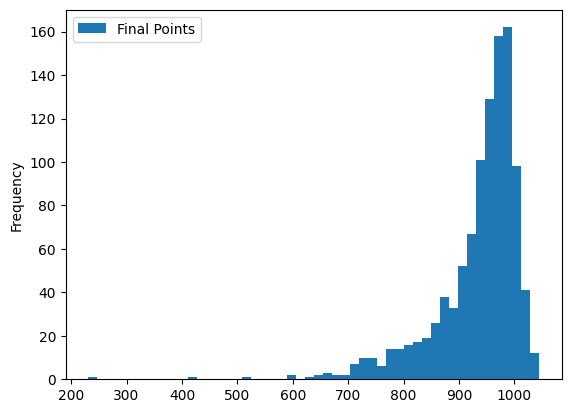

In [25]:
# Create a histogram of the all the final scores in DISCOVERY:
df.plot.hist(bins=50)

### Counting Unique Values

When you need to find the count of unique values contained in a DataFrame, the `.value_counts()` function will return a DataFrame that contains each unique value and the number of times that value appears.

We'll want to reset the index to work with the data, so make sure to use `reset_index()` just like we did with groupby.  That means the full Python syntax to find all the unique values for `Final Points` is:

> ```py
> df.value_counts().reset_index()
> ```

Use this syntax to find all unique values for the `Final Points` column in `df` and assign this new DataFrame to the variable `df_courseFinalPoints`:

In [51]:
df_courseFinalPoints = df.value_counts().reset_index()
df_courseFinalPoints

,Final Points,count
0,963,15
1,969,14
2,973,13
3,967,13
4,953,13
...,...,...
259,1031,1
260,1029,1
261,1035,1
262,1036,1


In [27]:
### TEST CASE for `courseFinalPoints`
tada = "\N{PARTY POPPER}"

assert("df_courseFinalPoints" in vars()), "Make sure your new DataFrame is stored in the variable `df_courseFinalPoints`."
assert("Final Points" in df_courseFinalPoints), "Make sure to do .reset_index()"
assert("count" in df_courseFinalPoints or "0" in df_courseFinalPoints), "Make sure to do .reset_index()"
assert( len(df_courseFinalPoints) == 264), "Your DataFrame is the wrong length."

print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Building a Discrete Distribution for DISCOVERY

Recall from Part 2 that we need to create two lists, `outcomes` and `probability`:

> ```py
> outcomes    = [   1,   2,   3,   4,   5,   6 ]
> probability = [ 1/6, 1/6, 1/6, 1/6, 1/6, 1/6 ]
> ```

Applying this to the DataFrame you just created, the `outcomes` are the various final total points in DISCOVERY of the 1,045 students last Fall.  The `probability` is the likelihood of each outcome.  Looking at the first few rows, this means two lists of values might be:

> ```py
> # List of total final points in DISCOVERY:
> outcomes    = [ 963, 969, 967, ... ]
>
> # Occurrences of each outcome:
> occurrence   = [ 15,  14,  13, ... ]
> ```

*(Note we'll find the occurrence first, and then covert that to the final probability.)*

### Extracting the List of Outcomes

In your `df_courseFinalPoints` DataFrame, you have two columns: `Final Points` and `count` (or, on older versions of the library, just `0`).  To extract a list of values from a specific column, as a list, you'll use the `.values` method on the column.  For example, to get a list of values for the column `Illinois` from the DataFrame `df`, you can use the following code:

> ```py
> df["Illinois"].values
> ```

Use your `df_courseFinalPoints` to find the list of all `outcomes` in DISCOVERY:

In [29]:
outcomes = df_courseFinalPoints['Final Points'].values
outcomes

array([ 963,  969,  973,  967,  953,  955,  987,  989,  972,  983,  979,
        970,  993,  986,  959,  990,  937,  998,  966,  988,  996,  950,
        982,  968,  980,  997,  971,  992,  958,  956,  976,  974,  981,
        995, 1007,  965, 1000,  944,  946,  964,  936,  994, 1004,  939,
        943,  926,  978,  961, 1008, 1011,  933,  949,  960,  977,  947,
        931,  920,  942,  985,  984,  951,  941,  934,  839,  914,  922,
       1003, 1020,  912,  905,  886, 1001,  707, 1009, 1002,  999, 1025,
        962,  903,  991,  858,  940,  952,  945,  957,  876, 1019, 1015,
        915,  917,  913,  904,  877,  888,  927, 1013, 1006, 1026,  873,
        875,  930,  824,  928,  954,  773,  883,  902,  891,  909,  923,
        916,  929,  907,  896,  882,  911, 1018,  751,  735, 1027, 1016,
       1005, 1012,  862,  870,  863,  812, 1033,  832,  919,  948,  774,
        807,  785,  932,  975,  796,  938,  860,  766,  788, 1032, 1043,
        805,  859,  935,  884,  881,  925,  771,  8

### Extracting the List of Occurrences

Repeat the same process to find the list of all `occurrences`, or how many times each of the outcomes occurred:

In [33]:
occurrences = df_courseFinalPoints['count'].values
occurrences

array([15, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11,
       11, 11, 10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

### Converting `occurrences` to a Probability

To use this data to create a distribution, we need both the **outcome** and the **probability**.  Currently, we have the outcomes (`outcomes`), but we do not have a probability.  To convert `occurrences` to a probability, we need to divide `occurrences` by the total number of students to convert it to a probability.

Create a new variable `probability` that is the `probability` for getting each value in `Final Points`.  

*Hint 1: You can divide an entire list by a number, and it will divide each individual element of the list by that number; ex: `probability = counts / 10` will divide each value in `counts` by 10.*

*Hint 2: To get the total number of students, think about what each value in `occurrences` represents.*

In [39]:
total_occurrence = sum(occurrences)
probability = occurrences / total_occurrence
probability

array([0.01435407, 0.01339713, 0.01244019, 0.01244019, 0.01244019,
       0.01244019, 0.01148325, 0.01148325, 0.01148325, 0.01148325,
       0.01148325, 0.01148325, 0.01148325, 0.01052632, 0.01052632,
       0.01052632, 0.01052632, 0.01052632, 0.01052632, 0.00956938,
       0.00956938, 0.00956938, 0.00956938, 0.00956938, 0.00956938,
       0.00956938, 0.00861244, 0.00861244, 0.00861244, 0.00861244,
       0.00861244, 0.00861244, 0.00861244, 0.00861244, 0.00861244,
       0.00861244, 0.0076555 , 0.0076555 , 0.0076555 , 0.0076555 ,
       0.0076555 , 0.0076555 , 0.0076555 , 0.0076555 , 0.0076555 ,
       0.0076555 , 0.00669856, 0.00669856, 0.00669856, 0.00669856,
       0.00669856, 0.00669856, 0.00669856, 0.00669856, 0.00669856,
       0.00669856, 0.00669856, 0.00669856, 0.00574163, 0.00574163,
       0.00574163, 0.00574163, 0.00574163, 0.00574163, 0.00574163,
       0.00574163, 0.00574163, 0.00574163, 0.00574163, 0.00574163,
       0.00574163, 0.00574163, 0.00478469, 0.00478469, 0.00478

### Create the DISCOVERY distribution

Using `rv_discrete` (see Section 2 to refresh your memory), create the `DISCOVERY` discrete random variable:

In [40]:
DISCOVERY = rv_discrete( values=(outcomes, probability) )

### Statistic #1: Average Score

Using the `DISCOVERY` distribution, what is the average score (or "expected value"), in points, in DISCOVERY?  Store your result in `avg_score`:

In [41]:
avg_score = DISCOVERY.mean()
avg_score

np.float64(934.5502392344499)

### Statistic #2: Median Score

Using the `DISCOVERY` distribution, what is the median score (the 50th percentile), in points, in DISCOVERY?  Store your result in `median_score`:

In [42]:
median_score = DISCOVERY.median()
median_score

np.float64(958.0)

### Statistic #3: Earning an "A" in DISCOVERY

What percentage of students earned an "A" in DISCOVERY?  Earning an "A" requires a student to earn 930 points.  Store the percentage of people in `pct_A`:

(Not sure how to find this?  Check out the DISCOVERY page on "Python Functions for Random Distributions" here:
https://discovery.cs.illinois.edu/learn/Polling-Confidence-Intervals-and-Hypothesis-Testing/Python-Functions-for-Random-Distributions/)

In [83]:
A_number = df[df["Final Points"] >= 930]
pct_A = len(A_number)/len(df)
pct_A

0.6813397129186602

### 🔬 Checkpoint Tests 🔬

In [84]:
### TEST CASE for Random Variable #4: Final Scores in DISCOVERY
tada = "\N{PARTY POPPER}"

import math
assert("DISCOVERY" in vars())
assert("avg_score" in vars())
assert(math.isclose(avg_score, 934.5502392344499)), "Your average score is incorrect."
assert(math.isclose(median_score, 958)), "Your median score is incorrect."
assert(pct_A > 0.50), "There were more than 50% As... are you sure the function is doing what you expect it to be doing?"
assert(not math.isclose(pct_A, 1 - 0.32248803827751177)), "If you earn a 930, you still get an \"A\".  If looks like your solution excluded 930 as an \"A\" -- make sure to include it."
assert(math.isclose(pct_A, 1 - 0.31866028708133953))

assert(math.isclose(DISCOVERY.mean(), avg_score))

print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Analysis: Highly Qualified CA

One of many factors we look at in hiring excellent CAs for DISCOVERY is their course grade.  We find that students in the top 10% of the course are highly qualified in terms of course knowledge.

**Q5: What is the minimum grade a student needs to earn in DISCOVERY in Fall 2023 to be highly qualified in terms of course knowledge?**

*Use the first cell below to write the Python code to compute the value, and then edit the Markdown cell to record your answer as a complete sentence.*

In [82]:
# Edit this cell to write the Python code to compute the value, and then
# edit the Markdown cell to record your answer as a complete sentence.
Top10rows = int(0.1 * len(df))
df["Final Points"].head(Top10rows)



0      1045
1      1043
2      1043
3      1036
4      1035
       ... 
99     1004
100    1003
101    1003
102    1003
103    1003
Name: Final Points, Length: 104, dtype: int64

*(According to my data, the minimum grade a student needs to earn for 10% is about 1003)*

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)